In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import os, glob
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE


from imblearn.pipeline import Pipeline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
all_files = glob.glob(os.path.join("stroke_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

df=df_merged.drop_duplicates()

In [3]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1523
smoking_status       13292
stroke                   0
dtype: int64

In [4]:
df.loc[:,'bmi'].fillna(df.loc[:,'bmi'].mean(),inplace=True)
df.isnull().sum()
df.dropna(inplace=True)
df.to_csv('finalfinalDataset.csv',index=False)

In [5]:
df = pd.read_csv('finalfinalDataset.csv')

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.504671,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31647,56196,Female,10.0,0,0,No,children,Urban,58.64,20.400000,never smoked,0
31648,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.400000,formerly smoked,0
31649,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.900000,formerly smoked,0
31650,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.200000,never smoked,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31652 entries, 0 to 31651
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 31652 non-null  int64  
 1   gender             31652 non-null  object 
 2   age                31652 non-null  float64
 3   hypertension       31652 non-null  int64  
 4   heart_disease      31652 non-null  int64  
 5   ever_married       31652 non-null  object 
 6   work_type          31652 non-null  object 
 7   Residence_type     31652 non-null  object 
 8   avg_glucose_level  31652 non-null  float64
 9   bmi                31652 non-null  float64
 10  smoking_status     31652 non-null  object 
 11  stroke             31652 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.9+ MB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,31652.000000,31652.000000,31652.000000,31652.000000,31652.000000,31652.000000,31652.000000
mean,36562.890907,47.071433,0.113105,0.054531,106.818752,29.794879,0.021642
std,21112.416540,19.484343,0.316726,0.227065,45.580178,7.180392,0.145513
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18186.750000,31.000000,0.000000,0.000000,77.790000,24.900000,0.000000
50%,36715.000000,48.000000,0.000000,0.000000,92.290000,28.504671,0.000000
75%,54818.000000,62.000000,0.000000,0.000000,114.220000,33.500000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.drop('id',inplace=True,axis=1)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.504671,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
31647,Female,10.0,0,0,No,children,Urban,58.64,20.400000,never smoked,0
31648,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.400000,formerly smoked,0
31649,Female,82.0,1,0,Yes,Private,Urban,91.94,28.900000,formerly smoked,0
31650,Male,40.0,0,0,Yes,Private,Urban,99.16,33.200000,never smoked,0


# **GENDER COLUMN ANALYSIS**

In [12]:
print('Unique values\n',df['gender'].unique())

Unique values
 ['Male' 'Female' 'Other']


In [13]:
df['gender'].isna().sum()

0

In [14]:
print('Value Counts\n',df['gender'].value_counts())

Value Counts
 Female    19202
Male      12441
Other         9
Name: gender, dtype: int64


In [15]:
print('Male and stroke ',len(df[(df['gender']=='Male') & (df['stroke']==1)]))
print('Male and without stroke ',len(df[(df['gender']=='Male') & (df['stroke']==0)]))
print('Female and stroke ',len(df[(df['gender']=='Female') & (df['stroke']==1)]))
print('Female and without stroke ',len(df[(df['gender']=='Female') & (df['stroke']==0)]))
print('Other and stroke ',len(df[(df['gender']=='Other') & (df['stroke']==1)]))
print('Other and without stroke ',len(df[(df['gender']=='Other') & (df['stroke']==0)]))

Male and stroke  300
Male and without stroke  12141
Female and stroke  385
Female and without stroke  18817
Other and stroke  0
Other and without stroke  9


<AxesSubplot:xlabel='gender', ylabel='count'>

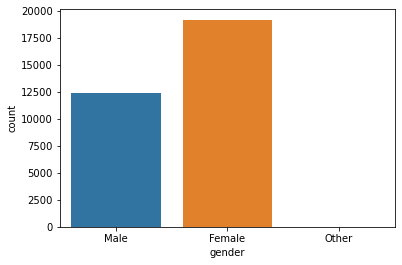

In [16]:
sns.countplot(data=df,x='gender')


<AxesSubplot:xlabel='gender', ylabel='count'>

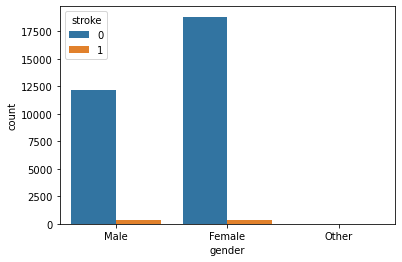

In [17]:
sns.countplot(data=df,x='gender',hue='stroke')

# **AGE COLUMN ANALYSIS**

In [18]:
df['age'].nunique()

104

In [19]:
df['age'].isna().sum()

0

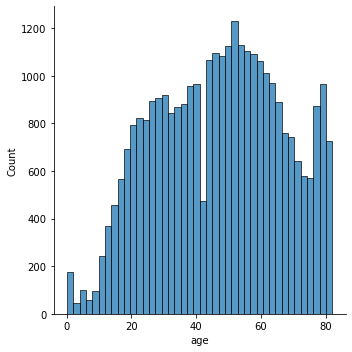

In [20]:
sns.displot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

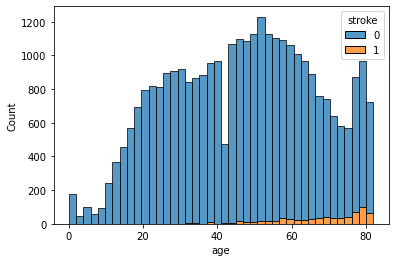

In [21]:
sns.histplot(data=df, x="age", hue="stroke", multiple="stack")

# **Hypertention column Analysis**

In [22]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [23]:
df['hypertension'].isna().sum()

0

In [24]:
df['hypertension'].value_counts()

0    28072
1     3580
Name: hypertension, dtype: int64

In [25]:
print('hypertension and stroke ',len(df[(df['hypertension']==1) & (df['stroke']==1)]))
print('hypertension and without stroke ',len(df[(df['hypertension']==1) & (df['stroke']==0)]))
print('without hypertension and stroke ',len(df[(df['hypertension']==0) & (df['stroke']==1)]))
print('without hypertension and without stroke ',len(df[(df['hypertension']==0) & (df['stroke']==0)]))

hypertension and stroke  181
hypertension and without stroke  3399
without hypertension and stroke  504
without hypertension and without stroke  27568


<AxesSubplot:xlabel='hypertension', ylabel='count'>

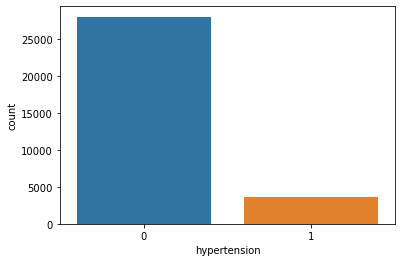

In [26]:
sns.countplot(data=df,x='hypertension')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

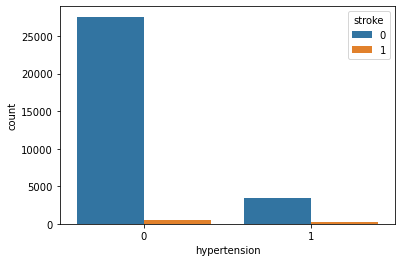

In [27]:
sns.countplot(data=df,x='hypertension',hue='stroke')

# **Heart Disease Column Analysis**

In [28]:
print(df['heart_disease'].unique())

[1 0]


In [29]:
df['heart_disease'].isna().sum()

0

In [30]:
print(df['heart_disease'].value_counts())

0    29926
1     1726
Name: heart_disease, dtype: int64


In [31]:
print('Heart disease and stroke ',len(df[(df['heart_disease']==1) & (df['stroke']==1)]))
print('Heart disease and without stroke ',len(df[(df['heart_disease']==1) & (df['stroke']==0)]))
print('without Heart disease and stroke ',len(df[(df['heart_disease']==0) & (df['stroke']==1)]))
print('without Heart disease and without stroke ',len(df[(df['heart_disease']==0) & (df['stroke']==0)]))

Heart disease and stroke  150
Heart disease and without stroke  1576
without Heart disease and stroke  535
without Heart disease and without stroke  29391


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

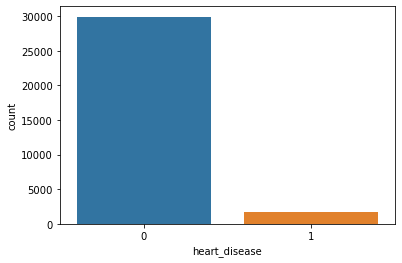

In [32]:
sns.countplot(data=df,x='heart_disease')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

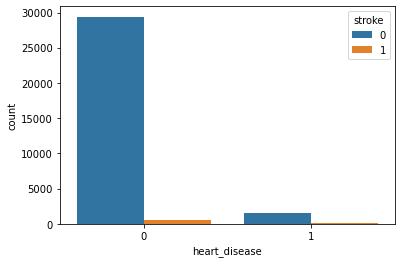

In [33]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

# **EVER MARRIED COLUMN ANALYSIS**

In [34]:
print(df['ever_married'].unique())
print(df['ever_married'].value_counts())

['Yes' 'No']
Yes    23194
No      8458
Name: ever_married, dtype: int64


In [35]:
df['ever_married'].isna().sum()

0

In [36]:
print('Married and stroke ',len(df[(df['ever_married']=='Yes') & (df['stroke']==1)]))
print('Married and without stroke ',len(df[(df['ever_married']=='Yes') & (df['stroke']==0)]))
print('without Married and stroke ',len(df[(df['ever_married']=='No') & (df['stroke']==1)]))
print('without Married and without stroke ',len(df[(df['ever_married']=='No') & (df['stroke']==0)]))

Married and stroke  614
Married and without stroke  22580
without Married and stroke  71
without Married and without stroke  8387


<AxesSubplot:xlabel='ever_married', ylabel='count'>

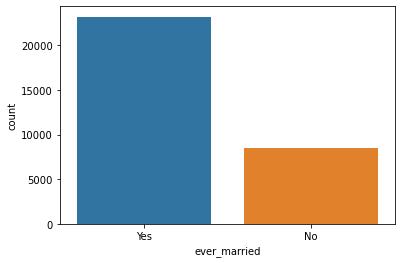

In [37]:
sns.countplot(data=df,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

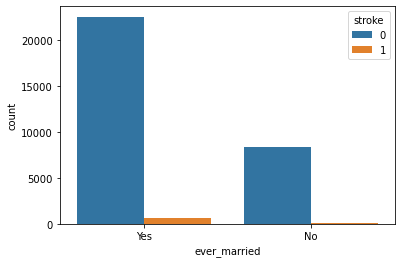

In [38]:
sns.countplot(data=df,x='ever_married',hue='stroke')

# **WORK TYPE COLUMN ANALYSIS**

In [39]:
print(df['work_type'].unique())
print(df['work_type'].value_counts())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          20225
Self-employed     5601
Govt_job          4468
children          1249
Never_worked       109
Name: work_type, dtype: int64


In [40]:
df['work_type'].isna().sum()

0

In [41]:
print('Private and stroke ',len(df[(df['work_type']=='Private') & (df['stroke']==1)]))
print('Private and without stroke ',len(df[(df['work_type']=='Private') & (df['stroke']==0)]))

print('Self-employed and stroke ',len(df[(df['work_type']=='Self-employed') & (df['stroke']==1)]))
print('Self-employed and without stroke ',len(df[(df['work_type']=='Self-employed') & (df['stroke']==0)]))

print('children and stroke ',len(df[(df['work_type']=='children') & (df['stroke']==1)]))
print('children and without stroke ',len(df[(df['work_type']=='children') & (df['stroke']==0)]))

print('Govt_job and stroke ',len(df[(df['work_type']=='Govt_job') & (df['stroke']==1)]))
print('Govt_job and without stroke ',len(df[(df['work_type']=='Govt_job ') & (df['stroke']==0)]))

print('Never_worked and stroke ',len(df[(df['work_type']=='Never_worked') & (df['stroke']==1)]))
print('Never_worked and without stroke ',len(df[(df['work_type']=='Never_worked') & (df['stroke']==0)]))

Private and stroke  393
Private and without stroke  19832
Self-employed and stroke  210
Self-employed and without stroke  5391
children and stroke  2
children and without stroke  1247
Govt_job and stroke  80
Govt_job and without stroke  0
Never_worked and stroke  0
Never_worked and without stroke  109


<AxesSubplot:xlabel='work_type', ylabel='count'>

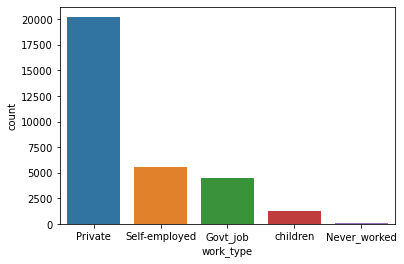

In [42]:
sns.countplot(data=df,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

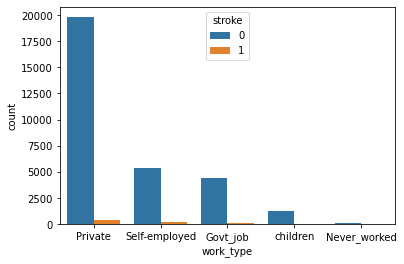

In [43]:
sns.countplot(data=df,x='work_type',hue='stroke')

# **RESIDENCE TYPE COLUMN ANALYSIS**

In [44]:
print(df['Residence_type'].unique())
print(df['Residence_type'].value_counts())

['Urban' 'Rural']
Urban    15908
Rural    15744
Name: Residence_type, dtype: int64


In [45]:
df['Residence_type'].isna().sum()

0

In [46]:
print('Urban and stroke ',len(df[(df['Residence_type']=='Urban') & (df['stroke']==1)]))
print('Urban and without stroke ',len(df[(df['Residence_type']=='Urban') & (df['stroke']==0)]))
print('Rural and stroke ',len(df[(df['Residence_type']=='Rural') & (df['stroke']==1)]))
print('Rural and without stroke ',len(df[(df['Residence_type']=='Rural') & (df['stroke']==0)]))

Urban and stroke  354
Urban and without stroke  15554
Rural and stroke  331
Rural and without stroke  15413


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

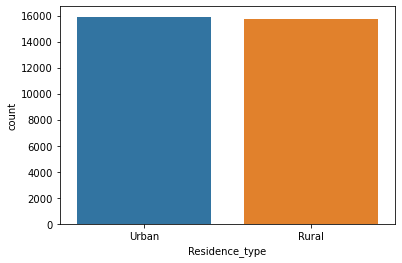

In [47]:
sns.countplot(data=df,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

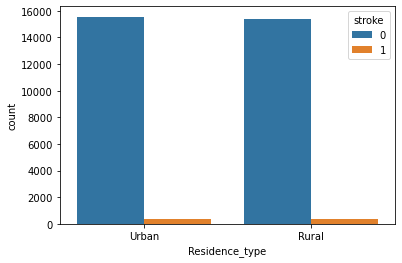

In [48]:
sns.countplot(data=df,x='Residence_type',hue='stroke')

# **AVERAGE GLUCOSE LEVEL ANALYSIS**

In [49]:
df['avg_glucose_level'].nunique()

11471

In [50]:
df['avg_glucose_level'].isna().sum()

0

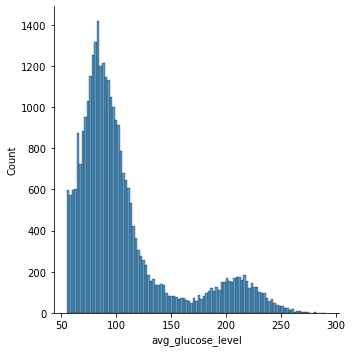

In [51]:
sns.displot(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

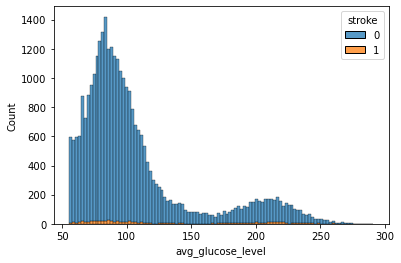

In [52]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", multiple="stack")

# **BMI COLUMN ANALYSIS**

In [53]:
df['bmi'].isna().sum()
df['bmi'].nunique()

531

In [54]:
df['bmi'].isna().sum()

0

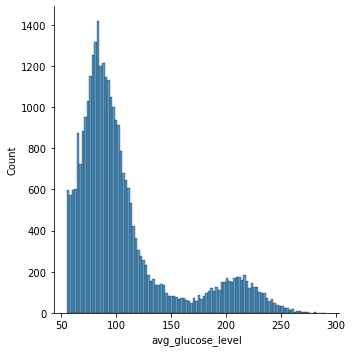

In [55]:
sns.displot(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

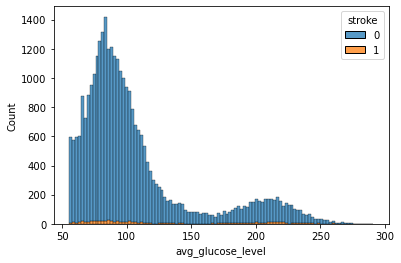

In [56]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", multiple="stack")

# **SMOKING STATUS COLUMN ANALYSIS**

In [57]:
print(df['smoking_status'].unique())
print(df['smoking_status'].value_counts())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']
never smoked       16053
formerly smoked     7493
smokes              6562
Unknown             1544
Name: smoking_status, dtype: int64


In [58]:
df['smoking_status'].isnull().sum()

0

In [59]:
print('formerly smoked and stroke ',len(df[(df['smoking_status']=='formerly smoked') & (df['stroke']==1)]))
print('formerly smoked and without stroke ',len(df[(df['smoking_status']=='formerly smoked') & (df['stroke']==0)]))

print('never smoked and stroke ',len(df[(df['smoking_status']=='never smoked') & (df['stroke']==1)]))
print('never smoked and without stroke ',len(df[(df['smoking_status']=='never smoked') & (df['stroke']==0)]))

print('smokes and stroke ',len(df[(df['smoking_status']=='smokes') & (df['stroke']==1)]))
print('smokes smoked and without stroke ',len(df[(df['smoking_status']=='smokes') & (df['stroke']==0)]))

print('Unknown and stroke ',len(df[(df['smoking_status']=='Unknown') & (df['stroke']==1)]))
print('Unknown and without stroke ',len(df[(df['smoking_status']=='Unknown') & (df['stroke']==0)]))

formerly smoked and stroke  221
formerly smoked and without stroke  7272
never smoked and stroke  284
never smoked and without stroke  15769
smokes and stroke  133
smokes smoked and without stroke  6429
Unknown and stroke  47
Unknown and without stroke  1497


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

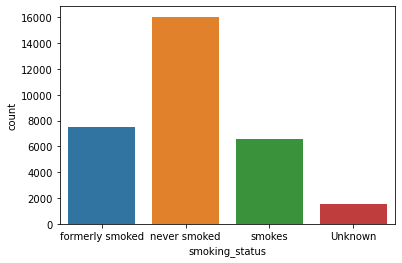

In [60]:
sns.countplot(data=df,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

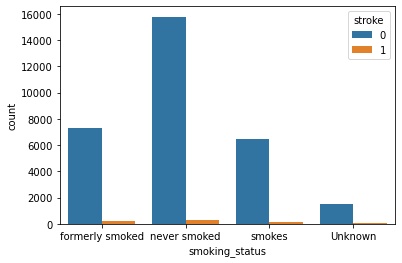

In [61]:
sns.countplot(data=df,x='smoking_status',hue='stroke')

# **STOKE TARGET CLASS**

In [62]:
print(df['stroke'].unique())
print(df['stroke'].value_counts())

[1 0]
0    30967
1      685
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

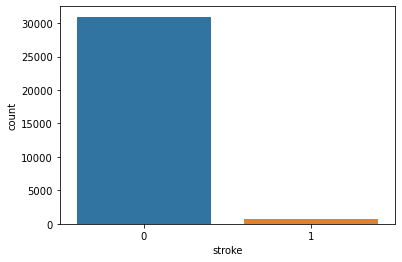

In [63]:
sns.countplot(data=df,x='stroke')

In [64]:
df.shape

(31652, 11)

# **LABEL ENCODING**

In [65]:
df['gender']=df['gender'].apply(lambda x :1 if x=='Male' else (2 if x == 'Female' else 3 ))

In [66]:
df['ever_married']=df['ever_married'].apply(lambda x :1 if x=='Yes' else 2)

In [67]:
df['work_type']=df['work_type'].apply(lambda x :1 if x=='Govt_job' else (2 if x == 'Never_worked' else 3 if x=='Private' else 4 if x=='Self-employed'
                                                                  else 5))

In [68]:
df['Residence_type']=df['Residence_type'].apply(lambda x :1 if x=='Rural' else 2)

In [69]:
df['smoking_status']=df['smoking_status'].apply(lambda x :1 if x=='Unknown' else (2 if x == 'formerly smoked' else 3 if x=='never smoked' else 4))

In [70]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,228.69,36.600000,2,1
1,2,61.0,0,0,1,4,1,202.21,28.504671,3,1
2,1,80.0,0,1,1,3,1,105.92,32.500000,3,1
3,2,49.0,0,0,1,3,2,171.23,34.400000,4,1
4,2,79.0,1,0,1,4,1,174.12,24.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...
31647,2,10.0,0,0,2,5,2,58.64,20.400000,3,0
31648,2,56.0,0,0,1,1,2,213.61,55.400000,2,0
31649,2,82.0,1,0,1,3,2,91.94,28.900000,2,0
31650,1,40.0,0,0,1,3,2,99.16,33.200000,3,0


# **NORMALIZING DATASET**

In [71]:
from sklearn import preprocessing
x_avg_glucose_level1 = np.array(df['avg_glucose_level'])
x_bmi1 = np.array(df['bmi'])
normalized_arr_glucose1 = preprocessing.normalize([x_avg_glucose_level1])
normalized_arr_bmi1 = preprocessing.normalize([x_bmi1])
print(normalized_arr_glucose1.shape)
print(normalized_arr_bmi1.shape)

(1, 31652)
(1, 31652)


In [72]:
df['avg_glucose_level'] = normalized_arr_glucose1[0].tolist()
df['bmi'] = normalized_arr_bmi1[0].tolist()

In [73]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,0.011068,0.006712,2,1
1,2,61.0,0,0,1,4,1,0.009787,0.005228,3,1
2,1,80.0,0,1,1,3,1,0.005126,0.005960,3,1
3,2,49.0,0,0,1,3,2,0.008287,0.006309,4,1
4,2,79.0,1,0,1,4,1,0.008427,0.004402,3,1
...,...,...,...,...,...,...,...,...,...,...,...
31647,2,10.0,0,0,2,5,2,0.002838,0.003741,3,0
31648,2,56.0,0,0,1,1,2,0.010338,0.010160,2,0
31649,2,82.0,1,0,1,3,2,0.004450,0.005300,2,0
31650,1,40.0,0,0,1,3,2,0.004799,0.006089,3,0


In [74]:
target_class = df.stroke
input_column = df.drop(['stroke'],axis=1)
train_x,test_x,train_y,test_y=train_test_split(input_column,target_class,random_state=5,test_size=0.20)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((25321, 10), (6331, 10), (25321,), (6331,))

In [75]:
train_y.value_counts(),test_y.value_counts()

(0    24767
 1      554
 Name: stroke, dtype: int64,
 0    6200
 1     131
 Name: stroke, dtype: int64)

In [76]:
train_x.shape,train_y.shape

((25321, 10), (25321,))

# **Feature Selection**

# Pearson Correalation

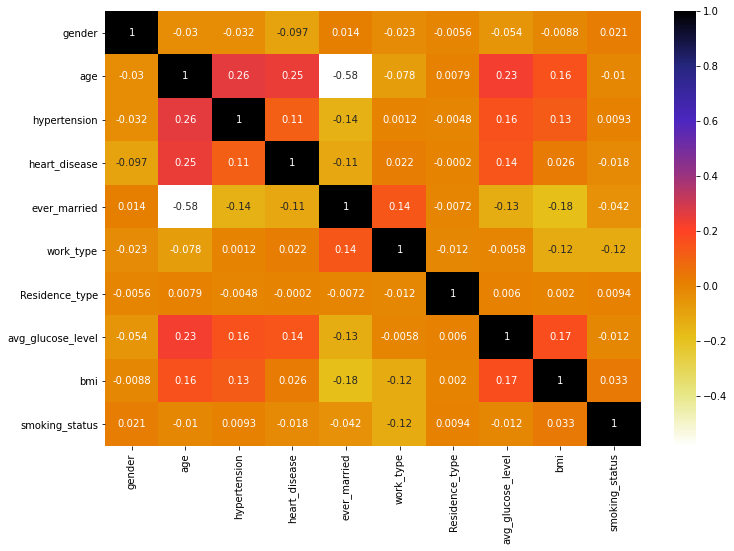

In [77]:
plt.figure(figsize=(12,8))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [78]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [79]:
corr_features = correlation(train_x, 0.7)

In [80]:
corr_features

set()

# Finding most Useful Features(Univariate Process)

In [81]:
bestfeatures = SelectKBest(score_func=chi2,k='all')
fit = bestfeatures.fit(input_column,target_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(input_column.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

In [82]:
featureScores

,Feature,Score
0,gender,0.889406
1,age,6600.090252
2,hypertension,141.385155
3,heart_disease,347.222571
4,ever_married,14.782312
5,work_type,2.786350
6,Residence_type,0.093926
7,avg_glucose_level,0.183361
8,bmi,0.000143
9,smoking_status,4.689472


In [83]:
print(featureScores.nlargest(5,'Score'))

          Feature        Score
1             age  6600.090252
3   heart_disease   347.222571
2    hypertension   141.385155
4    ever_married    14.782312
9  smoking_status     4.689472


# Finding most Useful Features(using ExtraTreesClassifier)

In [84]:
model = ExtraTreesClassifier()
model.fit(input_column,target_class)

ExtraTreesClassifier()

In [85]:
print(model.feature_importances_)

[0.02328024 0.23049434 0.01202432 0.01219896 0.00854899 0.03978409
 0.02495215 0.30857064 0.2846631  0.05548318]


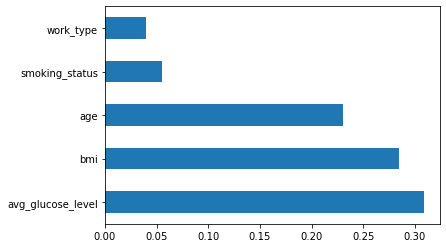

In [86]:
feat_importances = pd.Series(model.feature_importances_, index=input_column.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# **Removing not very important features**

In [87]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,0.011068,0.006712,2,1
1,2,61.0,0,0,1,4,1,0.009787,0.005228,3,1
2,1,80.0,0,1,1,3,1,0.005126,0.005960,3,1
3,2,49.0,0,0,1,3,2,0.008287,0.006309,4,1
4,2,79.0,1,0,1,4,1,0.008427,0.004402,3,1
...,...,...,...,...,...,...,...,...,...,...,...
31647,2,10.0,0,0,2,5,2,0.002838,0.003741,3,0
31648,2,56.0,0,0,1,1,2,0.010338,0.010160,2,0
31649,2,82.0,1,0,1,3,2,0.004450,0.005300,2,0
31650,1,40.0,0,0,1,3,2,0.004799,0.006089,3,0


In [88]:
df.drop('gender',inplace=True,axis=1)
df.drop('Residence_type',inplace=True,axis=1)

In [89]:
df

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,3,0.011068,0.006712,2,1
1,61.0,0,0,1,4,0.009787,0.005228,3,1
2,80.0,0,1,1,3,0.005126,0.005960,3,1
3,49.0,0,0,1,3,0.008287,0.006309,4,1
4,79.0,1,0,1,4,0.008427,0.004402,3,1
...,...,...,...,...,...,...,...,...,...
31647,10.0,0,0,2,5,0.002838,0.003741,3,0
31648,56.0,0,0,1,1,0.010338,0.010160,2,0
31649,82.0,1,0,1,3,0.004450,0.005300,2,0
31650,40.0,0,0,1,3,0.004799,0.006089,3,0


In [90]:
target_class = df.stroke
input_column = df.drop(['stroke'],axis=1)
train_x,test_x,train_y,test_y=train_test_split(input_column,target_class,random_state=5,test_size=0.20)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((25321, 8), (6331, 8), (25321,), (6331,))

# **Train and Test**

In [91]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target_names = ['0','1']

# **Hybrid data balancing techniqe (BorderlineSmote oversampling and RandomUnderSampler)**

# **Decision Tree (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      6200
           1       0.06      0.42      0.11       131

    accuracy                           0.86      6331
   macro avg       0.53      0.65      0.52      6331
weighted avg       0.97      0.86      0.91      6331

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      6200
           1       0.05      0.35      0.09       131

    accuracy                           0.85      6331
   macro avg       0.52      0.61      0.50      6331
weighted avg       0.97      0.85      0.90      6331

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6200
           1       0.06      0.42      0.10       131

    accuracy                           0.85      6331
   macro avg       0.52      0.64      0.51      6331
weighted avg       0.97      0.85      0.90      6331

              preci

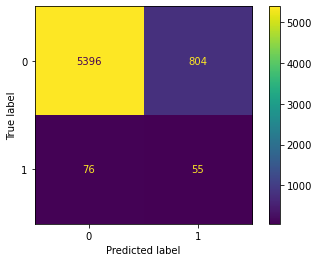

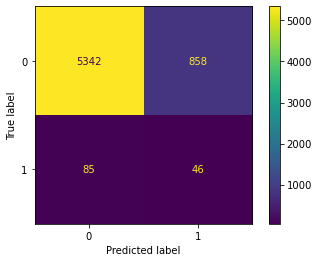

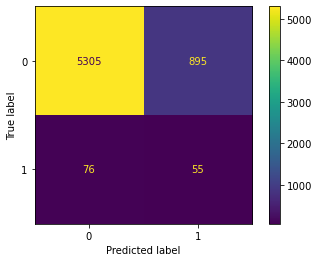

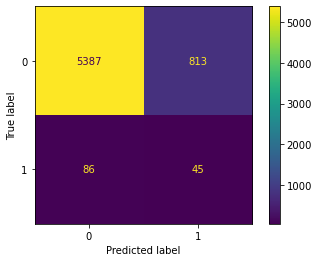

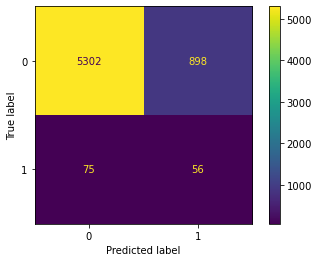

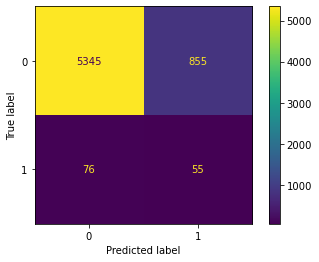

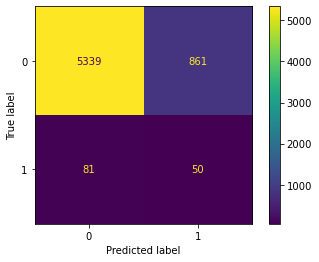

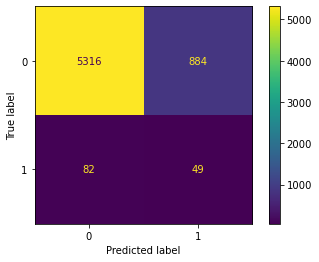

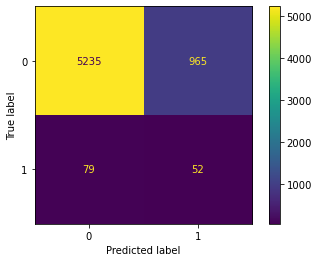

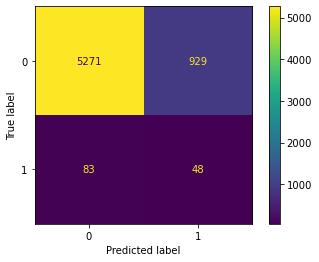

In [92]:
for k in k_values:
    model1 = DecisionTreeClassifier()
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps1 = [('over', over),('under', under),('model1', model1)] # For DecisionTree model
    
    # For DecisionTree model
    pipeline1 = Pipeline(steps=steps1)
    pipeline1.fit(train_x, train_y)
    y_pred1=pipeline1.predict(test_x)
    pipeline1.score(test_x,test_y)
    plot_confusion_matrix(pipeline1,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred1, target_names=target_names))

# **Gaussian naive bayes (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      6200
           1       0.06      0.73      0.12       131

    accuracy                           0.77      6331
   macro avg       0.53      0.75      0.49      6331
weighted avg       0.97      0.77      0.85      6331

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      6200
           1       0.06      0.73      0.11       131

    accuracy                           0.77      6331
   macro avg       0.53      0.75      0.49      6331
weighted avg       0.97      0.77      0.85      6331

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      6200
           1       0.06      0.74      0.11       131

    accuracy                           0.76      6331
   macro avg       0.53      0.75      0.49      6331
weighted avg       0.97      0.76      0.85      6331

              preci

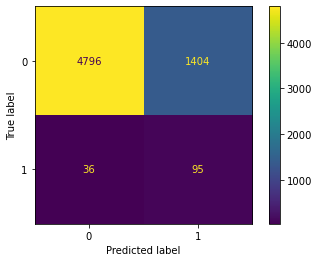

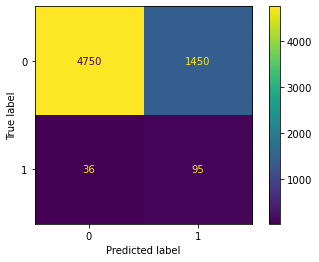

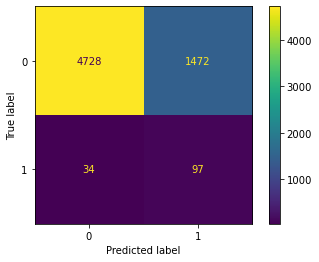

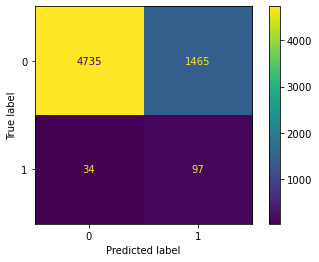

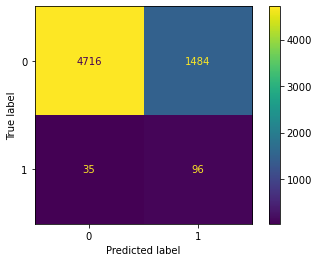

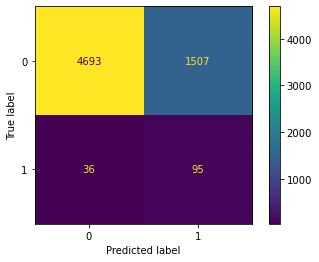

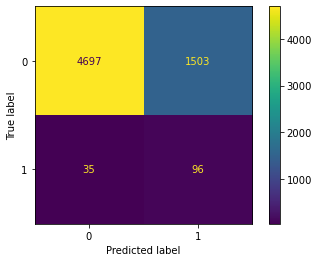

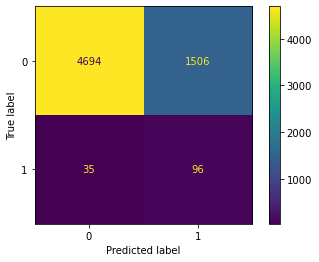

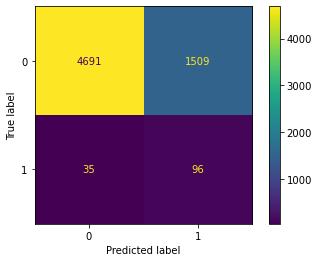

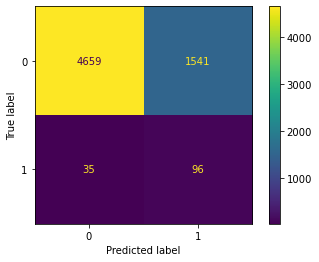

In [93]:
for k in k_values:
    model2 = GaussianNB()
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps2 = [('over', over),('under', under),('model2', model2)] # For GaussianNB model
    
    # For GaussianNB model
    pipeline2 = Pipeline(steps=steps2)
    pipeline2.fit(train_x, train_y)
    y_pred2=pipeline2.predict(test_x)
    pipeline2.score(test_x,test_y)
    plot_confusion_matrix(pipeline2,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred2, target_names=target_names))

# **SVM kernal linear (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      6200
           1       0.07      0.67      0.13       131

    accuracy                           0.81      6331
   macro avg       0.53      0.74      0.51      6331
weighted avg       0.97      0.81      0.88      6331

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      6200
           1       0.07      0.67      0.13       131

    accuracy                           0.81      6331
   macro avg       0.53      0.74      0.51      6331
weighted avg       0.97      0.81      0.88      6331

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      6200
           1       0.07      0.64      0.12       131

    accuracy                           0.81      6331
   macro avg       0.53      0.73      0.51      6331
weighted avg       0.97      0.81      0.88      6331

              preci

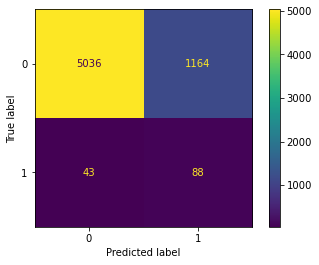

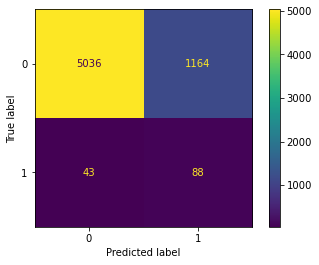

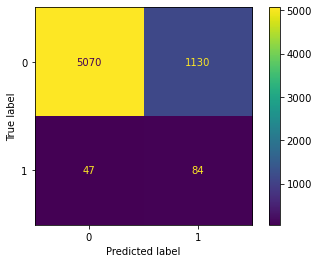

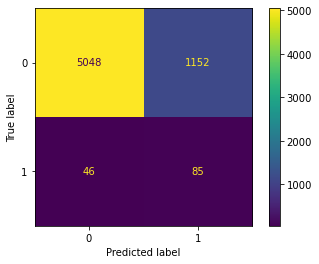

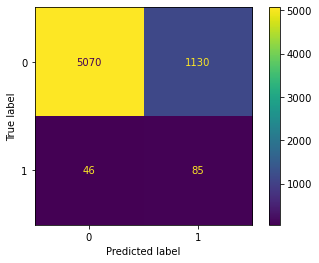

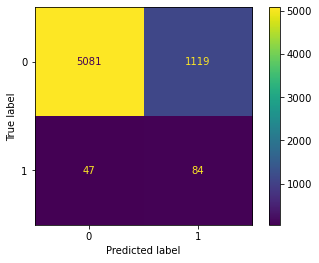

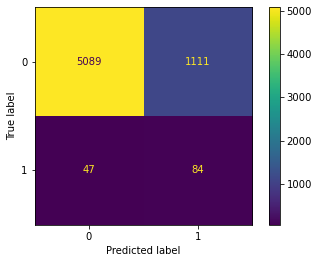

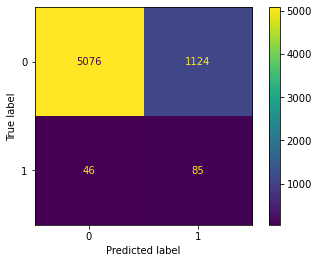

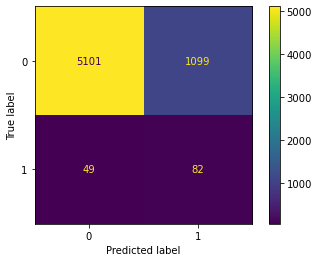

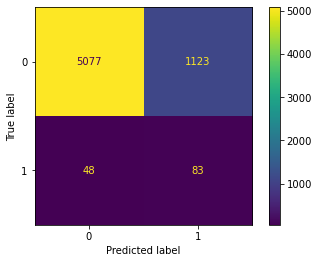

In [94]:
for k in k_values:
    model3 = SVC(kernel='linear')
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps3 = [('over', over),('under', under),('model3', model3)] # For SVM kernel linear model
    
    # For SVM kernel linear model
    pipeline3 = Pipeline(steps=steps3)
    pipeline3.fit(train_x, train_y)
    y_pred3=pipeline3.predict(test_x)
    pipeline3.score(test_x,test_y)
    plot_confusion_matrix(pipeline3,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred3, target_names=target_names))

# **SVM kernal poly (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6200
           1       0.07      0.61      0.13       131

    accuracy                           0.84      6331
   macro avg       0.53      0.73      0.52      6331
weighted avg       0.97      0.84      0.89      6331

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      6200
           1       0.08      0.60      0.13       131

    accuracy                           0.84      6331
   macro avg       0.53      0.72      0.52      6331
weighted avg       0.97      0.84      0.90      6331

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      6200
           1       0.08      0.60      0.13       131

    accuracy                           0.84      6331
   macro avg       0.53      0.72      0.52      6331
weighted avg       0.97      0.84      0.90      6331

              preci

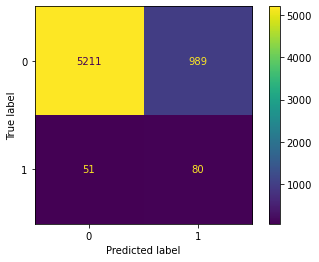

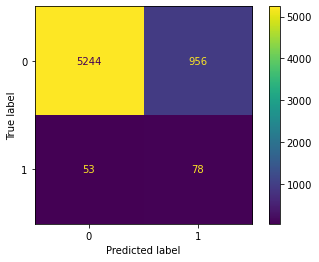

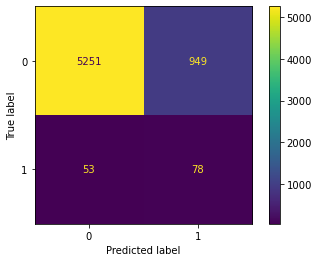

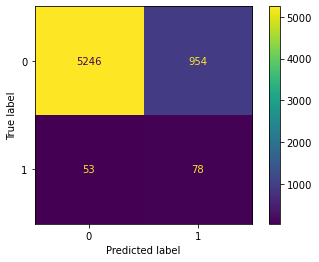

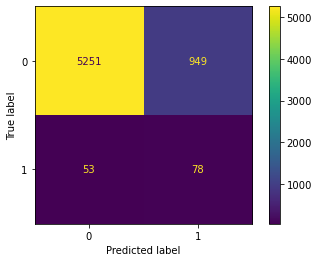

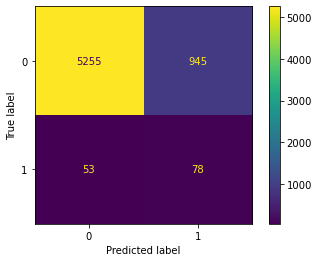

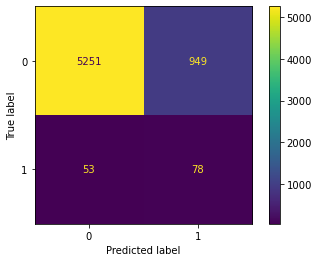

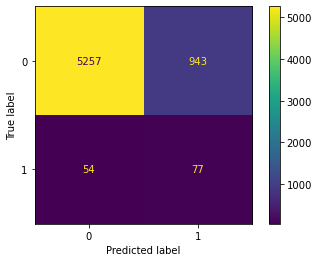

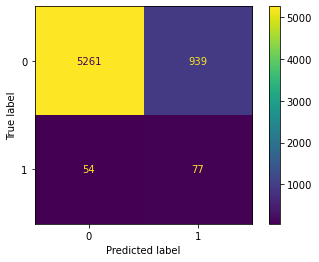

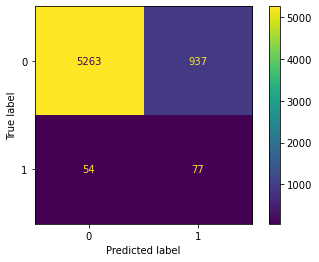

In [95]:
for k in k_values:
    model4 = SVC(kernel='poly',degree=3)
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps4 = [('over', over),('under', under),('model4', model4)] # For SVM kernel Poly model
    
    # For SVM kernel Poly model
    pipeline4 = Pipeline(steps=steps4)
    pipeline4.fit(train_x, train_y)
    y_pred4=pipeline4.predict(test_x)
    pipeline4.score(test_x,test_y)
    plot_confusion_matrix(pipeline4,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred4, target_names=target_names))

# **SVM kernal rbf (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6200
           1       0.07      0.50      0.13       131

    accuracy                           0.86      6331
   macro avg       0.53      0.68      0.52      6331
weighted avg       0.97      0.86      0.91      6331

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      6200
           1       0.07      0.50      0.13       131

    accuracy                           0.86      6331
   macro avg       0.53      0.68      0.52      6331
weighted avg       0.97      0.86      0.91      6331

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      6200
           1       0.08      0.46      0.13       131

    accuracy                           0.87      6331
   macro avg       0.53      0.67      0.53      6331
weighted avg       0.97      0.87      0.92      6331

              preci

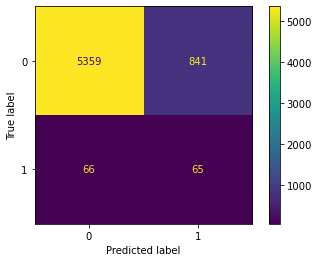

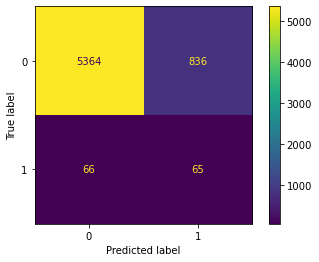

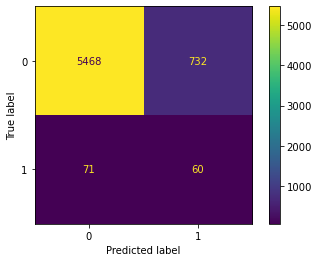

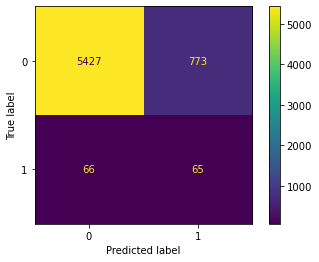

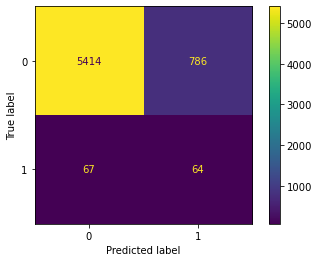

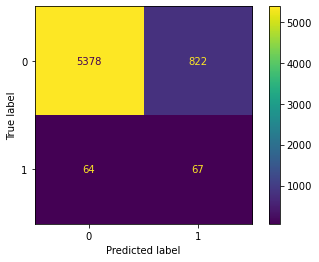

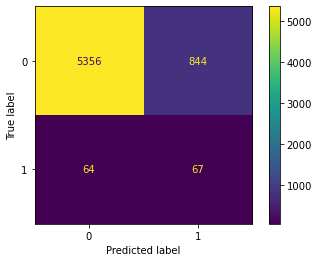

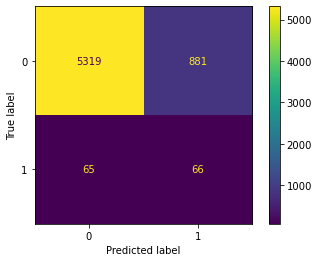

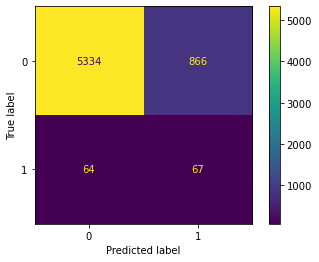

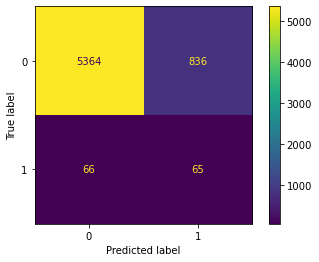

In [96]:
for k in k_values:
    model5 = SVC(kernel='rbf',gamma=0.10, C=8.0)
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps5 = [('over', over),('under', under),('model5', model5)] # For SVM kernel rbf model
    
    # For SVM kernel rbf model
    pipeline5 = Pipeline(steps=steps5)
    pipeline5.fit(train_x, train_y)
    y_pred5=pipeline5.predict(test_x)
    pipeline5.score(test_x,test_y)
    plot_confusion_matrix(pipeline5,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred5, target_names=target_names))

# **K-nearest neighbors (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      6200
           1       0.07      0.37      0.12       131

    accuracy                           0.88      6331
   macro avg       0.53      0.63      0.53      6331
weighted avg       0.97      0.88      0.92      6331

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      6200
           1       0.06      0.38      0.11       131

    accuracy                           0.87      6331
   macro avg       0.52      0.63      0.52      6331
weighted avg       0.97      0.87      0.91      6331

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      6200
           1       0.07      0.42      0.12       131

    accuracy                           0.87      6331
   macro avg       0.53      0.65      0.52      6331
weighted avg       0.97      0.87      0.91      6331

              preci

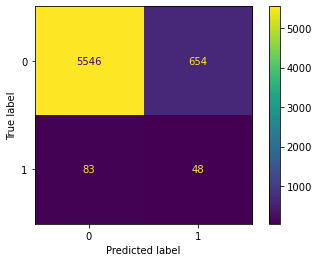

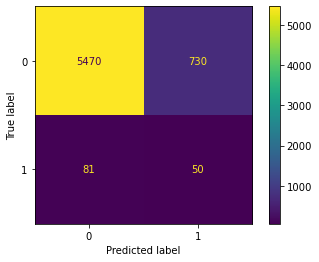

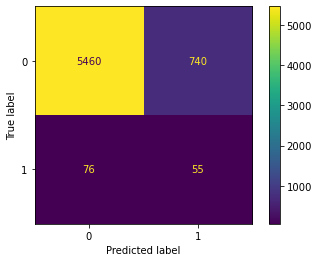

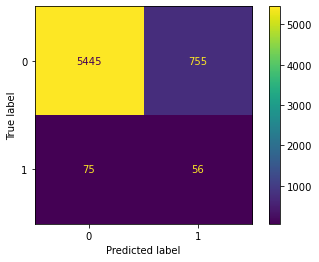

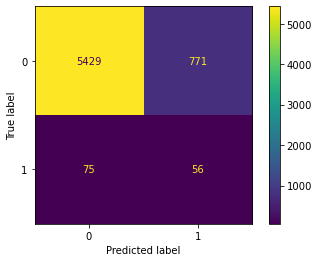

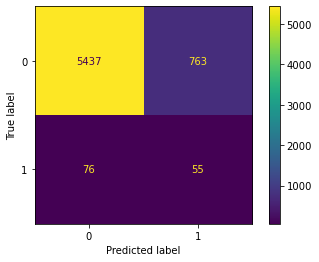

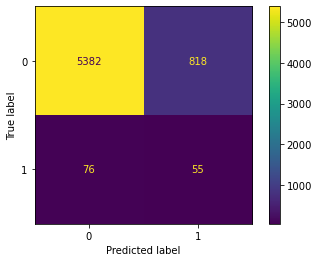

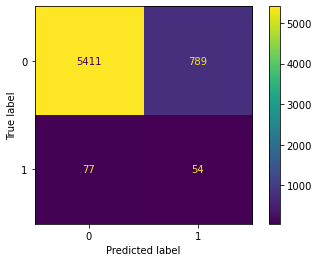

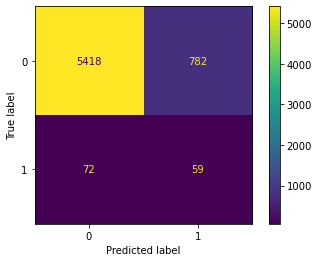

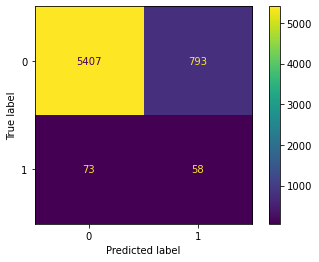

In [97]:
for k in k_values:
    model6 = KNeighborsClassifier(n_neighbors=7)
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps6 = [('over', over),('under', under),('model6', model6)] # For K-nearest neighbors model
    
    # For K-nearest neighbors model
    pipeline6 = Pipeline(steps=steps6)
    pipeline6.fit(train_x, train_y)
    y_pred6=pipeline6.predict(test_x)
    pipeline6.score(test_x,test_y)
    plot_confusion_matrix(pipeline6,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred6, target_names=target_names))

# **Hybrid data balancing techniqe (SVMSmote oversampling and RandomUnderSampler)**

# **Decision Tree (SVMSmote)**

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      6200
           1       0.05      0.44      0.08       131

    accuracy                           0.80      6331
   macro avg       0.52      0.63      0.49      6331
weighted avg       0.97      0.80      0.87      6331

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      6200
           1       0.05      0.43      0.09       131

    accuracy                           0.83      6331
   macro avg       0.52      0.63      0.50      6331
weighted avg       0.97      0.83      0.89      6331

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6200
           1       0.05      0.37      0.09       131

    accuracy                           0.84      6331
   macro avg       0.52      0.61      0.50      6331
weighted avg       0.97      0.84      0.90      6331

              preci

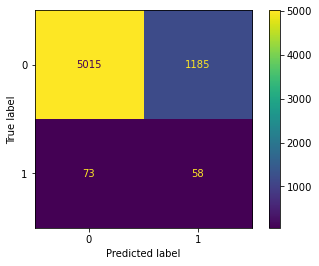

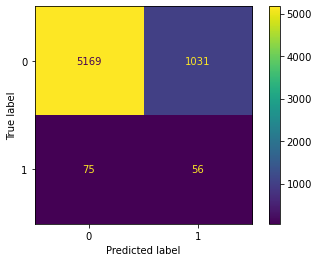

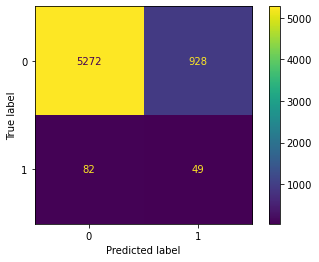

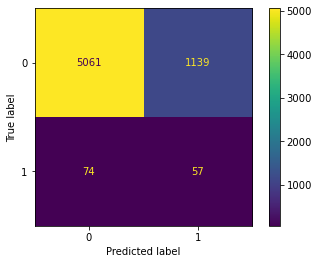

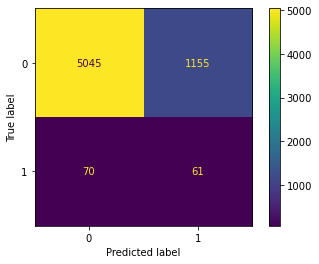

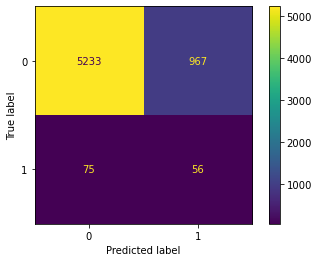

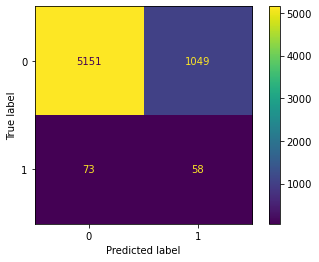

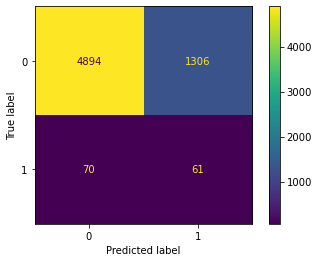

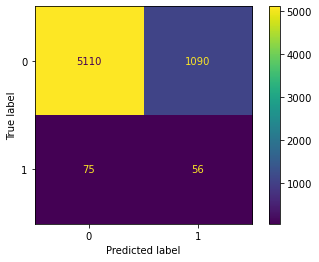

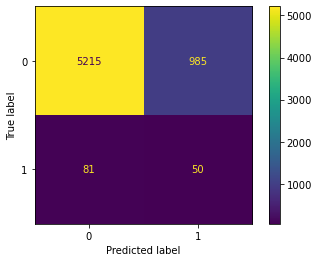

In [98]:
for k in k_values:
    model1 = DecisionTreeClassifier()
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps1 = [('over', over),('under', under),('model1', model1)] # For DecisionTree model
    
    # For DecisionTree model
    pipeline1 = Pipeline(steps=steps1)
    pipeline1.fit(train_x, train_y)
    y_pred1=pipeline1.predict(test_x)
    pipeline1.score(test_x,test_y)
    plot_confusion_matrix(pipeline1,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred1, target_names=target_names))

# **Gaussian naive bayes (SVMSmote)**

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      6200
           1       0.06      0.72      0.12       131

    accuracy                           0.77      6331
   macro avg       0.53      0.75      0.49      6331
weighted avg       0.97      0.77      0.86      6331

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      6200
           1       0.06      0.73      0.12       131

    accuracy                           0.77      6331
   macro avg       0.53      0.75      0.49      6331
weighted avg       0.97      0.77      0.85      6331

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      6200
           1       0.06      0.73      0.11       131

    accuracy                           0.77      6331
   macro avg       0.53      0.75      0.49      6331
weighted avg       0.97      0.77      0.85      6331

              preci

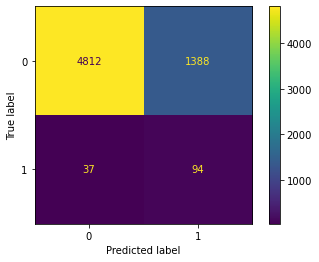

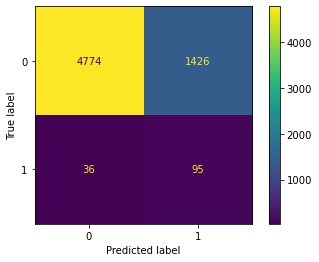

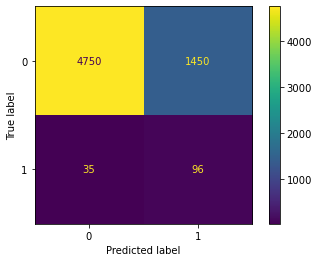

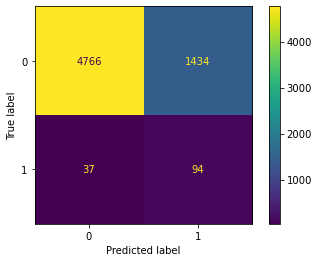

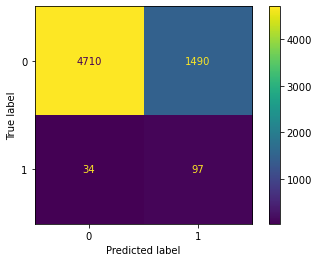

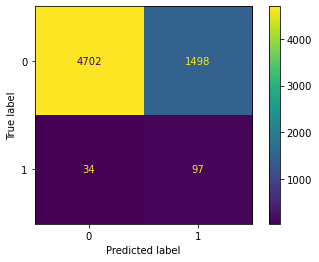

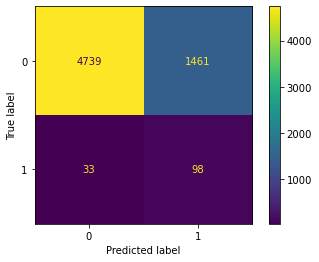

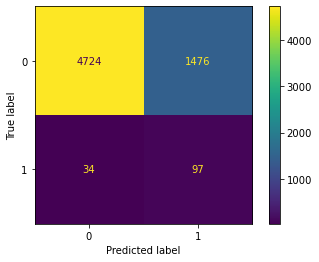

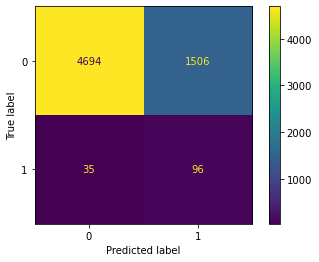

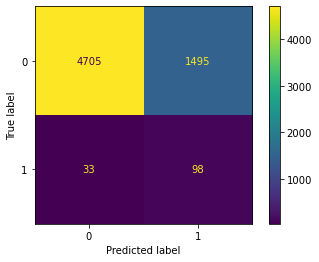

In [99]:
for k in k_values:
    model2 = GaussianNB()
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps2 = [('over', over),('under', under),('model2', model2)] # For GaussianNB model
    
    # For GaussianNB model
    pipeline2 = Pipeline(steps=steps2)
    pipeline2.fit(train_x, train_y)
    y_pred2=pipeline2.predict(test_x)
    pipeline2.score(test_x,test_y)
    plot_confusion_matrix(pipeline2,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred2, target_names=target_names))

# **SVM kernal linear (SVMSmote)**

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      6200
           1       0.07      0.69      0.13       131

    accuracy                           0.80      6331
   macro avg       0.53      0.75      0.51      6331
weighted avg       0.97      0.80      0.87      6331

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      6200
           1       0.07      0.68      0.13       131

    accuracy                           0.80      6331
   macro avg       0.53      0.74      0.51      6331
weighted avg       0.97      0.80      0.87      6331

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      6200
           1       0.07      0.68      0.12       131

    accuracy                           0.80      6331
   macro avg       0.53      0.74      0.51      6331
weighted avg       0.97      0.80      0.87      6331

              preci

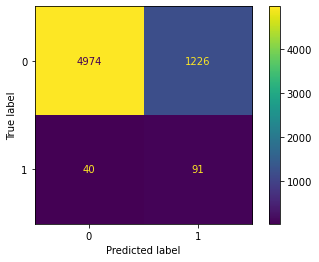

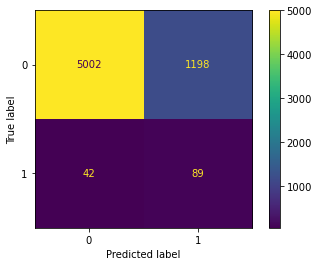

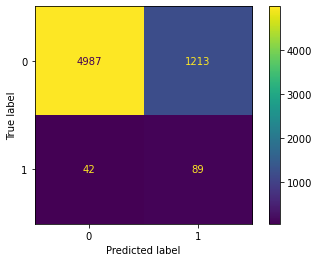

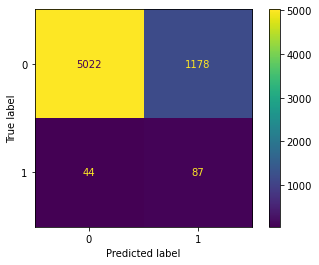

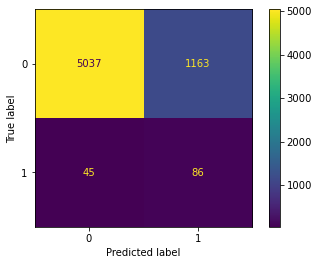

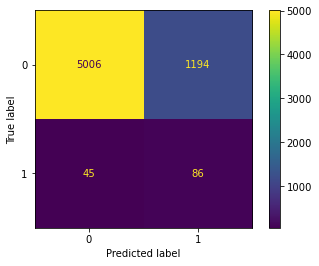

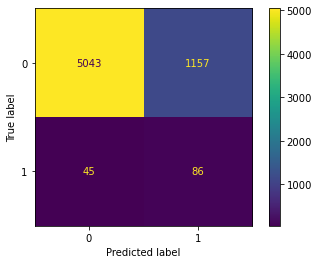

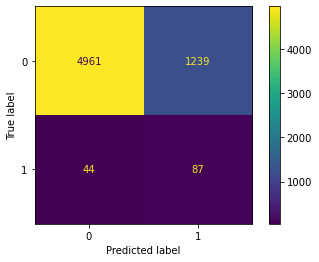

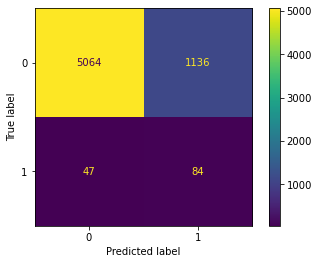

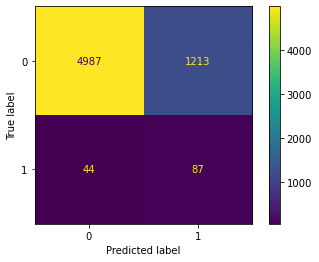

In [100]:
for k in k_values:
    model3 = SVC(kernel='linear')
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps3 = [('over', over),('under', under),('model3', model3)] # For SVM kernel linear model
    
    # For SVM kernel linear model
    pipeline3 = Pipeline(steps=steps3)
    pipeline3.fit(train_x, train_y)
    y_pred3=pipeline3.predict(test_x)
    pipeline3.score(test_x,test_y)
    plot_confusion_matrix(pipeline3,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred3, target_names=target_names)) 

# **SVM kernal poly (SVMSmote)**

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6200
           1       0.08      0.60      0.13       131

    accuracy                           0.84      6331
   macro avg       0.53      0.72      0.52      6331
weighted avg       0.97      0.84      0.90      6331

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6200
           1       0.08      0.63      0.13       131

    accuracy                           0.83      6331
   macro avg       0.53      0.73      0.52      6331
weighted avg       0.97      0.83      0.89      6331

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6200
           1       0.07      0.60      0.13       131

    accuracy                           0.83      6331
   macro avg       0.53      0.72      0.52      6331
weighted avg       0.97      0.83      0.89      6331

              preci

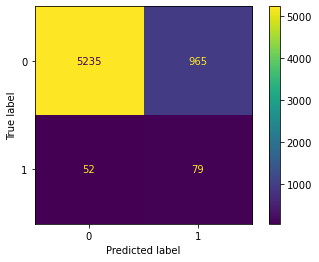

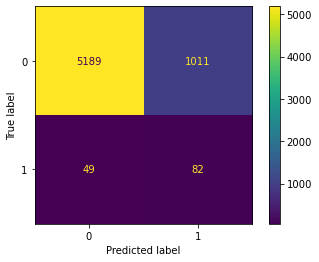

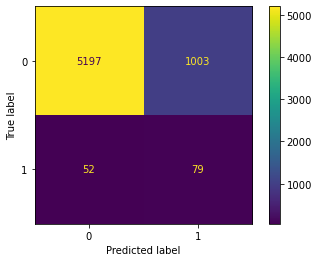

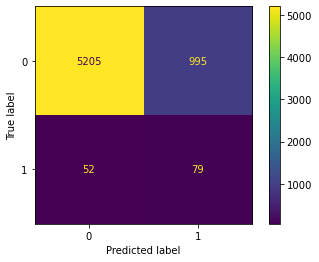

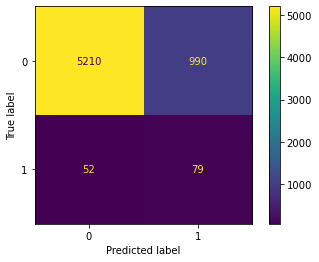

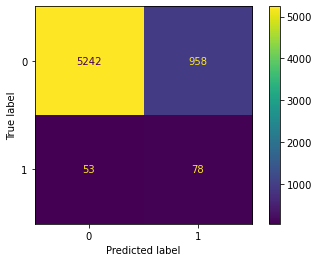

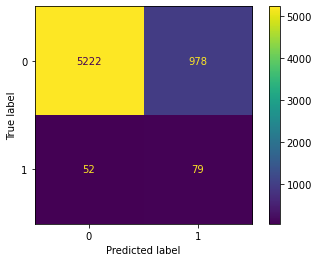

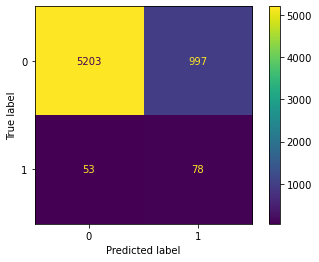

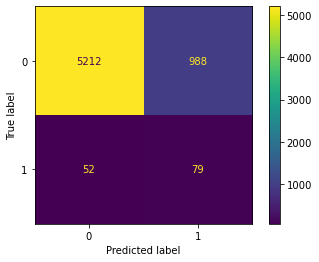

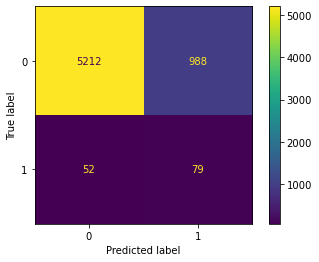

In [101]:
for k in k_values:
    model4 = SVC(kernel='poly',degree=3)
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps4 = [('over', over),('under', under),('model4', model4)] # For SVM kernel Poly model
    
    # For SVM kernel Poly model
    pipeline4 = Pipeline(steps=steps4)
    pipeline4.fit(train_x, train_y)
    y_pred4=pipeline4.predict(test_x)
    pipeline4.score(test_x,test_y)
    plot_confusion_matrix(pipeline4,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred4, target_names=target_names))

# **SVM kernal rbf (SVMSmote)**

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      6200
           1       0.08      0.51      0.14       131

    accuracy                           0.87      6331
   macro avg       0.53      0.69      0.53      6331
weighted avg       0.97      0.87      0.91      6331

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      6200
           1       0.08      0.51      0.13       131

    accuracy                           0.86      6331
   macro avg       0.53      0.69      0.53      6331
weighted avg       0.97      0.86      0.91      6331

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6200
           1       0.07      0.53      0.13       131

    accuracy                           0.85      6331
   macro avg       0.53      0.69      0.53      6331
weighted avg       0.97      0.85      0.90      6331

              preci

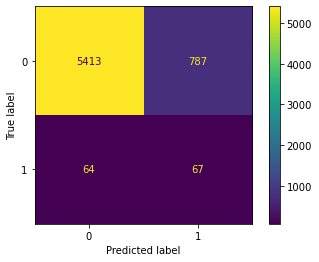

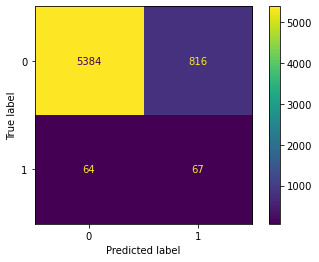

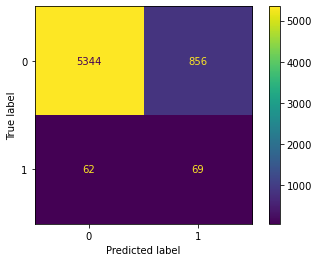

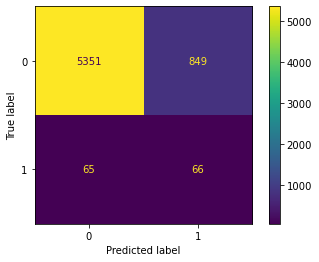

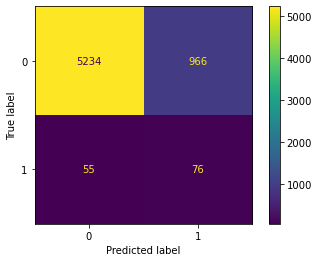

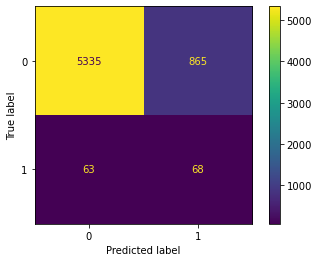

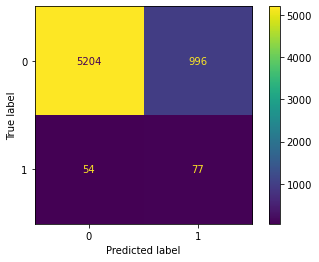

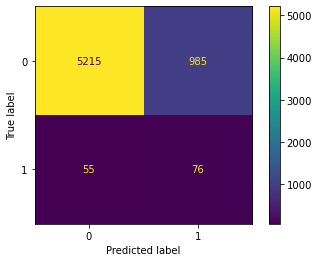

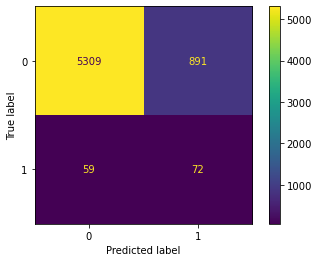

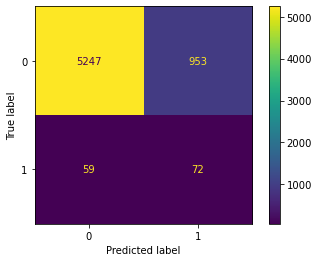

In [102]:
for k in k_values:
    model5 = SVC(kernel='rbf',gamma=0.10, C=8.0)
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps5 = [('over', over),('under', under),('model5', model5)] # For SVM kernel rbf model
    
    # For SVM kernel rbf model
    pipeline5 = Pipeline(steps=steps5)
    pipeline5.fit(train_x, train_y)
    y_pred5=pipeline5.predict(test_x)
    pipeline5.score(test_x,test_y)
    plot_confusion_matrix(pipeline5,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred5, target_names=target_names))

# **K-nearest neighbors (SVMSmote)**

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      6200
           1       0.07      0.42      0.11       131

    accuracy                           0.86      6331
   macro avg       0.53      0.65      0.52      6331
weighted avg       0.97      0.86      0.91      6331

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6200
           1       0.06      0.40      0.10       131

    accuracy                           0.85      6331
   macro avg       0.52      0.63      0.51      6331
weighted avg       0.97      0.85      0.90      6331

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6200
           1       0.07      0.53      0.12       131

    accuracy                           0.84      6331
   macro avg       0.53      0.69      0.52      6331
weighted avg       0.97      0.84      0.89      6331

              preci

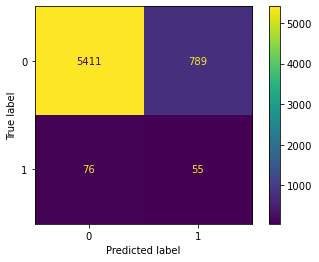

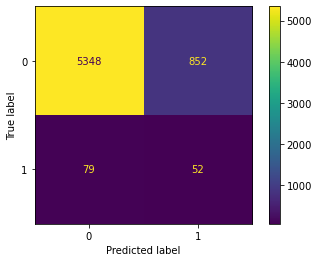

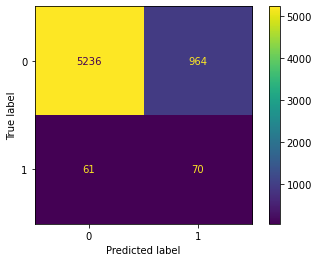

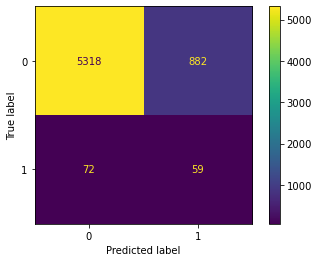

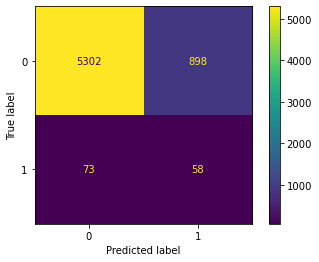

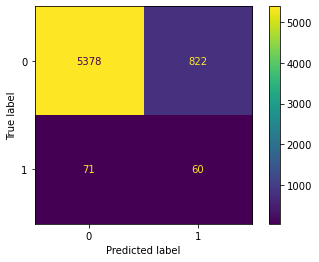

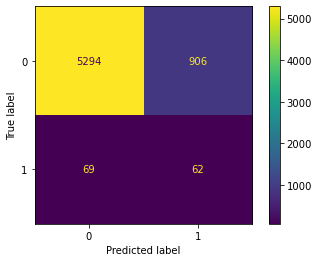

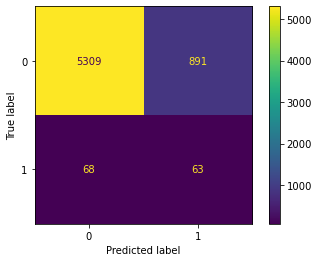

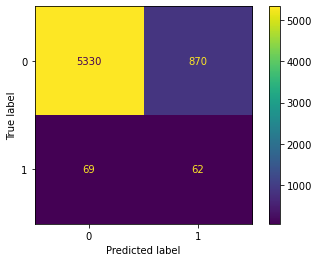

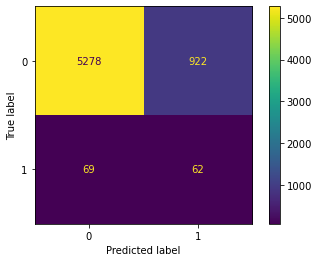

In [103]:
for k in k_values:
    model6 = KNeighborsClassifier(n_neighbors=7)
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps6 = [('over', over),('under', under),('model6', model6)] # For K-nearest neighbors model
    
    # For K-nearest neighbors model
    pipeline6 = Pipeline(steps=steps6)
    pipeline6.fit(train_x, train_y)
    y_pred6=pipeline6.predict(test_x)
    pipeline6.score(test_x,test_y)
    plot_confusion_matrix(pipeline6,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred6, target_names=target_names))

# **Hybrid data balancing techniqe ( SMOTETOMEK )**

# **Decision Tree (SmoteTomek)**

In [104]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = DecisionTreeClassifier()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.8908545253514453

<AxesSubplot:>

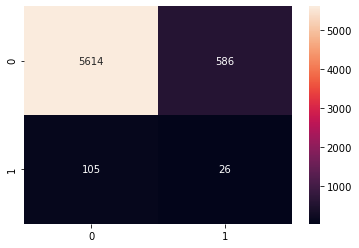

In [105]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [106]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      6200
           1       0.04      0.20      0.07       131

    accuracy                           0.89      6331
   macro avg       0.51      0.55      0.51      6331
weighted avg       0.96      0.89      0.92      6331



# **Gaussian naive bayes (SmoteTomek)**

In [107]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model=GaussianNB()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.6139630390143738

<AxesSubplot:>

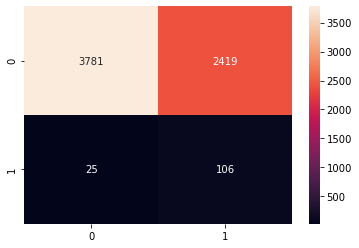

In [108]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [109]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76      6200
           1       0.04      0.81      0.08       131

    accuracy                           0.61      6331
   macro avg       0.52      0.71      0.42      6331
weighted avg       0.97      0.61      0.74      6331



# **SVM Kernal linear (SmoteTomek)**

In [110]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = SVC(kernel='linear')

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7654398989101248

<AxesSubplot:>

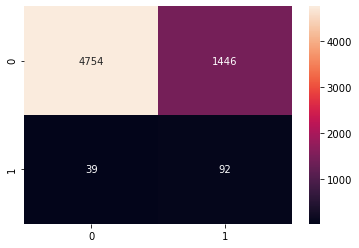

In [111]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [112]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      6200
           1       0.06      0.70      0.11       131

    accuracy                           0.77      6331
   macro avg       0.53      0.73      0.49      6331
weighted avg       0.97      0.77      0.85      6331



# **SVM Kernal poly (SmoteTomek)**

In [113]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = SVC(kernel='poly',degree=3)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.77270573369136

<AxesSubplot:>

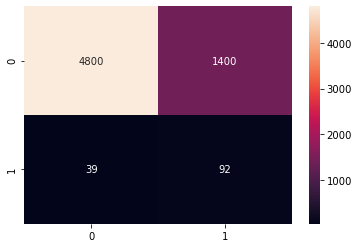

In [114]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [115]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      6200
           1       0.06      0.70      0.11       131

    accuracy                           0.77      6331
   macro avg       0.53      0.74      0.49      6331
weighted avg       0.97      0.77      0.85      6331



# **SVM Kernal rbf (SmoteTomek)**

In [116]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = SVC(kernel='rbf',gamma=0.10, C=8.0)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7483809824672247

<AxesSubplot:>

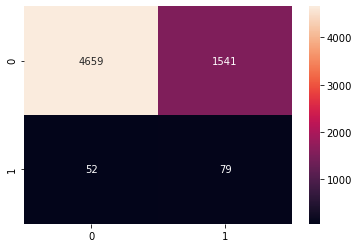

In [117]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [118]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      6200
           1       0.05      0.60      0.09       131

    accuracy                           0.75      6331
   macro avg       0.52      0.68      0.47      6331
weighted avg       0.97      0.75      0.84      6331



# **K-nearest neighbors (SmoteTomek)**

In [119]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = KNeighborsClassifier(n_neighbors=11)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.8488390459643026

<AxesSubplot:>

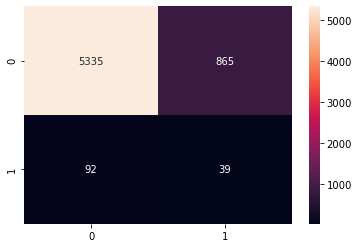

In [120]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [121]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      6200
           1       0.04      0.30      0.08       131

    accuracy                           0.85      6331
   macro avg       0.51      0.58      0.50      6331
weighted avg       0.96      0.85      0.90      6331



# **Decision Tree (Smote ENN)**

In [122]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = DecisionTreeClassifier()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.878376243879324

<AxesSubplot:>

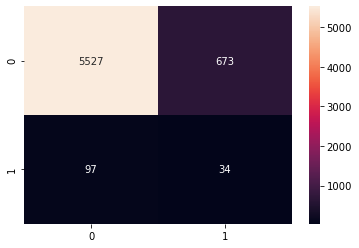

In [123]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [124]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      6200
           1       0.05      0.26      0.08       131

    accuracy                           0.88      6331
   macro avg       0.52      0.58      0.51      6331
weighted avg       0.96      0.88      0.92      6331



# **Gaussian naive bayes (Smote ENN)**

In [125]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model=GaussianNB()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.626441320486495

<AxesSubplot:>

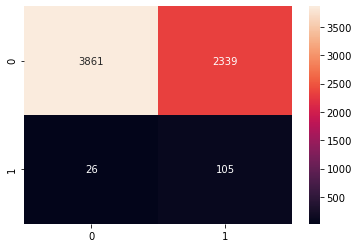

In [126]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [127]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.62      0.77      6200
           1       0.04      0.80      0.08       131

    accuracy                           0.63      6331
   macro avg       0.52      0.71      0.42      6331
weighted avg       0.97      0.63      0.75      6331



# **SVM Kernal linear (Smote ENN)**

In [128]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = SVC(kernel='linear')

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7407992418259358

<AxesSubplot:>

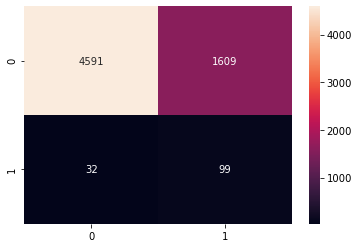

In [129]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [130]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      6200
           1       0.06      0.76      0.11       131

    accuracy                           0.74      6331
   macro avg       0.53      0.75      0.48      6331
weighted avg       0.97      0.74      0.83      6331



# **SVM Kernal poly (Smote ENN)**

In [131]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = SVC(kernel='poly',degree=3)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7482230295371979

<AxesSubplot:>

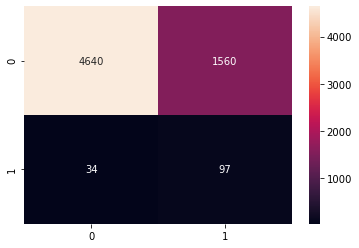

In [132]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [133]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      6200
           1       0.06      0.74      0.11       131

    accuracy                           0.75      6331
   macro avg       0.53      0.74      0.48      6331
weighted avg       0.97      0.75      0.84      6331



# **SVM Kernal rbf (Smote ENN)**

In [134]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = SVC(kernel='rbf',gamma=0.10, C=8.0)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7458537355867951

<AxesSubplot:>

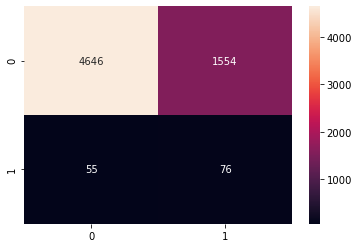

In [135]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [136]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      6200
           1       0.05      0.58      0.09       131

    accuracy                           0.75      6331
   macro avg       0.52      0.66      0.47      6331
weighted avg       0.97      0.75      0.84      6331



# **K-nearest neighbors (Smote ENN)**

In [137]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = KNeighborsClassifier(n_neighbors=11)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.8232506712999527

<AxesSubplot:>

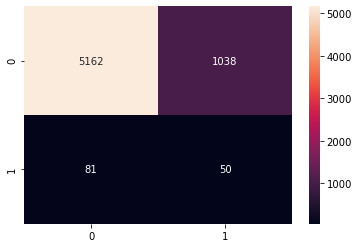

In [138]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [139]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      6200
           1       0.05      0.38      0.08       131

    accuracy                           0.82      6331
   macro avg       0.52      0.61      0.49      6331
weighted avg       0.97      0.82      0.89      6331

